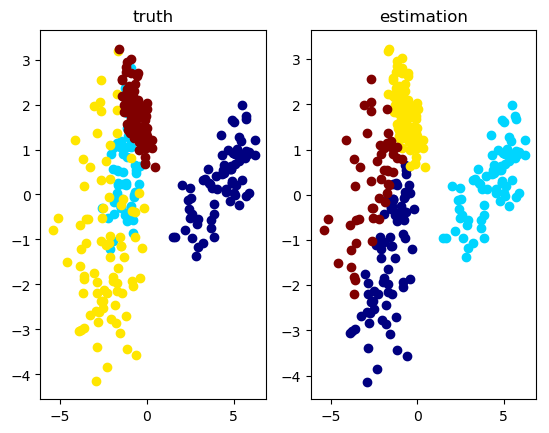

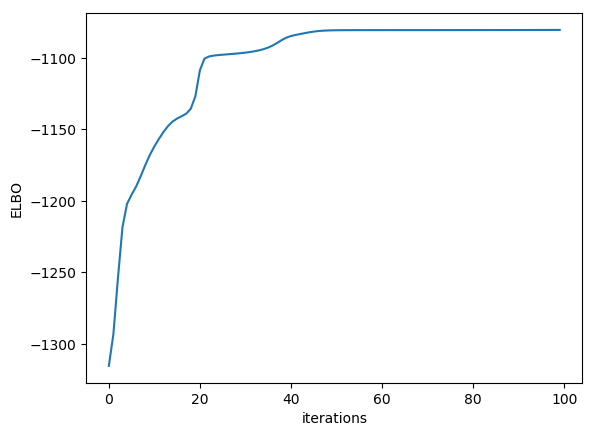

elapsed time: 0.419548812 seconds


In [3]:
###################################
## Example code
## for Bayesian Gaussin Mixture Model

using PyPlot, PyCall
push!(LOAD_PATH,".")
import GaussianMixtureModel

"""
Visualize data & estimation in 2D space.
"""
function visualize_2D(X::Matrix{Float64}, S::Matrix{Float64}, S_est::Matrix{Float64}, text)
    cmp = get_cmap("jet")

    K1 = size(S, 1)
    K2 = size(S_est, 1)
    col1 = [pycall(cmp.o, PyAny, Int(round(val)))[1:3] for val in linspace(0,255,K1)]    
    col2 = [pycall(cmp.o, PyAny, Int(round(val)))[1:3] for val in linspace(0,255,K2)]    

    f, (ax1, ax2) = subplots(1,2,num=text)
    f[:clf]()
    f, (ax1, ax2) = subplots(1,2,num=text)

    for k in 1 : K1
        ax1[:scatter](X[1, S[k,:].==1], X[2, S[k,:].==1], color=col1[k])
    end
    ax1[:set_title]("truth")
    
    for k in 1 : K2
        ax2[:scatter](X[1, S_est[k,:].==1], X[2, S_est[k,:].==1], color=col2[k])
    end

    ax2[:set_title]("estimation")
end

"""
Run a test script for 2D data clustering.
"""
function test_2D()
    ## set model
    D = 2 # data dimension
    K = 4 #  number of mixture components
    alpha = 100.0 * ones(K)
    beta = 0.1
    m = zeros(D)
    nu = D + 1.0
    W = eye(D)
    cmp = [GaussianMixtureModel.GW(beta, m, nu, W) for _ in 1 : K]
    bgmm = GaussianMixtureModel.BGMM(D, K, alpha, cmp)
    
    ## generate data
    N = 300
    gmm = GaussianMixtureModel.sample_GMM(bgmm)
    X, S = GaussianMixtureModel.sample_data(gmm, N)
    
    ## inference
    max_iter = 100
    tic()
    S_est, post_bgmm, VB = GaussianMixtureModel.learn_VI(X, bgmm, max_iter)
    #S_est, post_bgmm, VB = GaussianMixtureModel.learn_GS(X, bgmm, max_iter)
    #S_est, post_bgmm, VB = GaussianMixtureModel.learn_CGS(X, bgmm, max_iter)
    toc()

    ## plot
    visualize_2D(X, S, GaussianMixtureModel.winner_takes_all(S_est), "2D plot")

    # VB check
    figure("ELBO")
    clf()
    plot(VB)
    ylabel("ELBO")
    xlabel("iterations")
    show()
end

test_2D()